In [1]:
import numpy as np
from sympy import symbols, Eq, Function,UnevaluatedExpr, Mul, Rational, sqrt, Min
from sympy import Piecewise, nan, N, And, log
from sympy import *
from sympy import N
init_printing()
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex, Image
from Patch_Loading import *
import nbformat
from nbconvert import HTMLExporter


In [2]:
F_Ed, t_w, h_w, b_f, f_yf, t_f, f_yw, gamma_M1, E, s_s, a, c, epsilon, f_y = symbols(
	'F_Ed t_w h_w b_f f_yf t_f f_yw gamma_M1 E s_s a c epsilon f_y')

k_F, F_cr, m_1, m_2, l_e, l_y, F_y, lambda_F, chi_F, F_Rd, eta_2=symbols('k_F  F_cr  m_1  m_2  l_e  l_y  F_y  lambda_F  chi_F  F_Rd  eta_2')


In [3]:
# Input parameters
F_Ed_val = 1415  # OK
t_w_val = 15e-3  # OK
h_w_val = 270e-3  # OK
b_f_val = 300e-3  # OK
f_yf_val = 355e3  # OK
t_f_val = 30e-3  # OK
f_yw_val = 355e3  # OK
gamma_M1_val = 1.1  # OK
E_val = 200e6  # OK
s_s_val = 300e-3  # OK
a_val = 1185e-3  # OK
c_val = 0.9
db={'F_Ed':F_Ed_val, 't_w': t_w_val, 'h_w': h_w_val, 'b_f':b_f_val,
	"f_yf": f_yf_val, "t_f":t_f_val, "f_yw":f_yw_val, "gamma_M1": gamma_M1_val,
	"E":E_val, "s_s":s_s_val, "a":a_val, "c":c_val}
Types=["A","B","C"]


In [4]:

Type= "A"


In [5]:
display(Markdown(f"""**Data:**

Type of loading application: {Type}
    
Design transverse force: $F_{{Ed}} ={F_Ed_val} [kN]$

Thickness of the plate: $t_w={t_w_val} [m]$
 
Clear web depth between flanges: $h_w={h_w_val} [m]$

Flange width: $b_f={b_f_val} [m]$

The yield strength of the web: $f_{{yf}}={f_yf_val} [kN/m^2]$

Flange thickness: $t_f={t_f_val} [m]$

The yield strength of the web: $f_{{yw}}={f_yw_val} [kN/m^2]$

Security coeficient(recommended 1.1 ): $\gamma_{{M1}}={gamma_M1_val}$

Elasticity module (recommended $200e6[kN/m^2])$: E={E_val} [kN/m^2]$

Longitudinal width of the load: $s_s={s_s_val} [m]$

Length of a stiffened or unstiffened plate: $a={a_val} [m]$

Distance (utilized exclusively when type C presented, see Figure 6.1): $c={c_val} [m]$
    
"""))

**Data:**

Type of loading application: A
    
Design transverse force: $F_{Ed} =1415 [kN]$

Thickness of the plate: $t_w=0.015 [m]$
 
Clear web depth between flanges: $h_w=0.27 [m]$

Flange width: $b_f=0.3 [m]$

The yield strength of the web: $f_{yf}=355000.0 [kN/m^2]$

Flange thickness: $t_f=0.03 [m]$

The yield strength of the web: $f_{yw}=355000.0 [kN/m^2]$

Security coeficient(recommended 1.1 ): $\gamma_{M1}=1.1$

Elasticity module (recommended $200e6[kN/m^2])$: E=200000000.0 [kN/m^2]$

Longitudinal width of the load: $s_s=0.3 [m]$

Length of a stiffened or unstiffened plate: $a=1.185 [m]$

Distance (utilized exclusively when type C presented, see Figure 6.1): $c=0.9 [m]$
    


Calculation of Buckling coefficient using Figure 6.1 "Buckling coefficients for different types of load application" from article 6.1 basis

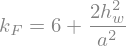

Calculation of critical force using expression (6.5) from article 6.4 "Reduction factor $\chi_F$ for effective length for resistance" 

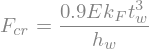

$F_{cr}=13733.60 [kN]$

Using expression (6.8) from article 6.5 "Effective loaded length", calculate $m_1$

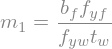

$m_{1}=20.00 [m]$

Using expression (6.9) from article 6.5 "Effective loaded length", calculate $m_2$

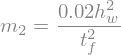

$m_{2}=1.620 [m]$

Using expression (6.10) from article 6.5 "Effective loaded length", calculate $l_y$

$l_{y}=0.6390 [m]$

$l_y=$0.6390 $<$ $a=$ 1.185 satisfies the condition $l_y<a$

Calculation of plastic web yielding mechanism, $F_y$, for non dimensional slenderness 

$F_{y}=3402.55 [KN]$

Calculation of $\lambda_F$, non dimensional slenderness using modification of expression (6.4) from article 6.4 "Reduction factor $\chi_F$ for efective lenght for resistance" 

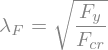

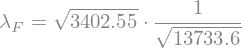

The value of $\lambda_F= 0.498 < 0.5$ then we need to recalculate $m_2=0$

Using expression (6.10) from article 6.5 "Effective loaded length", calculate $l_y$

$l_{y}=0.628 [m]$

$l_y=0.628 < a= 1.185$ satisfies the condition $l_y<a$

$F_{y}=3345.68 [kN]$

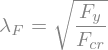

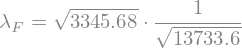

 $m_2=0$,  $\lambda_F=0.494 < 0.5$, does not satisfy the condition

In [6]:

    
    
if db['s_s'] < db['a']:
	display(Markdown(f"""Calculation of Buckling coefficient using Figure 6.1 "Buckling coefficients for different types of load application" from article 6.1 basis"""))
	display(k_F_func(Type))
	display(k_F_func(Type, **db))
	k_F_val=N(k_F_func(Type, **db). doit(),4)
	display(k_F_val)
	
	if Type=="C" and k_F_val.rhs>6.0:
		display(Markdown(f"""$k_F$ must be smaller than  $6.0$, then $k_F$ will take the value $6.0$"""))
		db['k_F']=6.0	
	else:
		db['k_F']=k_F_val.rhs
	display(Markdown(f"""Calculation of critical force using expression (6.5) from article 6.4 "Reduction factor $\chi_F$ for effective length for resistance" """))
	display(F_cr_func(Type))
	display(F_cr_func(Type, **db))
	F_cr_val=N(F_cr_func(Type, **db). doit(),7)
	display(Markdown(f"""$F_{{cr}}={F_cr_val.rhs} [kN]$"""))
	db['F_cr']=F_cr_val.rhs
	
	if db['F_cr'] < db['F_Ed']:
		display(Markdown(f"""$F_{{cr}}< F_{{Ed}}$,"""))
		display(Markdown(f"""The structure falls with patch loading by significant margin. Resize using much larger profiles"""))
	else:
		display(Markdown(f"""Using expression (6.8) from article 6.5 "Effective loaded length", calculate $m_1$"""))
		display(m_1_func(Type))
		display(m_1_func(Type, **db))
		m_1_val=N(m_1_func(Type, **db). doit(),4)
		#display(m_1_val)
		display(Markdown(f"""$m_{{1}}={m_1_val.rhs} [m]$"""))
		db['m_1']=m_1_val.rhs
		
		display(Markdown(f"""Using expression (6.9) from article 6.5 "Effective loaded length", calculate $m_2$"""))
		display(m_2_func(Type))
		display(m_2_func(Type, **db))
		m_2_val=N(m_2_func(Type, **db). doit(),4)
		display(Markdown(f"""$m_{{2}}={m_2_val.rhs} [m]$"""))
		#display(m_2_val)
		db['m_2']=m_2_val.rhs
	
		if Type=="C":
			display(Markdown(f"""Calculation of effective length $l_e$"""))
			display(l_e_func(Type))
			display(l_e_func(Type, **db))
			l_e_val=N(l_e_func(Type, **db). doit(),4)
			display(Markdown(f"""$l_{{e}}={l_e_val.rhs} [m]$"""))
			#display(l_e_val)
			db['l_e']=l_e_val.rhs # check the conditions
			
		display(Markdown(f"""Using expression (6.10) from article 6.5 "Effective loaded length", calculate $l_y$"""))
		display(l_y_func(Type))
		l_y_val=N(l_y_func(Type, **db). doit(),4)
		display(Markdown(f"""$l_{{y}}={l_y_val.rhs} [m]$"""))
	
		if Type=="A" or Type=="B": 
			if l_y_val.rhs<=db['a']:
				display(Markdown(f"""$l_y=${l_y_val.rhs} $<$ $a=$ {db["a"]} satisfies the condition $l_y<a$"""))
			if l_y_val.rhs>db['a']:
				display(Markdown(f"""The result $l_y={l_y_val.rhs} > a= {db["a"]}$, $l_y$ must be smaller than the distance between adjacent transverse stiffeners $a$, 
                so in this case $l_y$ will take the value of $a={db["a"]}$"""))
				display(Markdown(f"""$l_{{y}}={l_y_val.rhs} [m]$"""))

				db['l_y']=db['a']
			else:		
				db['l_y']=l_y_val.rhs
		else:
			db['l_y']=l_y_val.rhs
		
		display(Markdown(f"""Calculation of plastic web yielding mechanism, $F_y$, for non dimensional slenderness """))
		display(F_y_func(Type))
		display(F_y_func(Type, **db))
		F_y_val=N(F_y_func(Type, **db). doit(),6)
		display(Markdown(f"""$F_{{y}}={F_y_val.rhs} [KN]$"""))
		db['F_y']=F_y_val.rhs
	
		if db['F_y'] < db['F_Ed']:
			display(Markdown('$F_y < F_{Ed}$ The structure fails to meet patch loading requirements. Resize using larger profiles or consider bringing stifferners closer'))
	
		display(Markdown("""Calculation of $\lambda_F$, non dimensional slenderness using modification of expression (6.4) from article 6.4 "Reduction factor $\chi_F$ for efective lenght for resistance" """))
		display(lambda_F_func(Type))
		display(lambda_F_func1(Type, **db))
		lambda_F_val=N(lambda_F_func(Type, **db). doit(),3)
		display(lambda_F_val)
		db['lambda_F']=lambda_F_val.rhs

		if db['lambda_F']<=0.5:
			display(Markdown(f'The value of $\lambda_F= {db["lambda_F"]} < 0.5$ then we need to recalculate $m_2=0$'))
			del db['m_2']
			if 'l_e' in db.keys():
				del db['l_e']
			del db['l_y']
			del db['F_y']
			del db['lambda_F']
			display(Eq(m_2,0))
			db['m_2']=0


			if Type=="C":
				display(Markdown(f"""Calculation of effective length $l_e$"""))
				display(l_e_func(Type))
				display(l_e_func(Type, **db))
				l_e_val=N(l_e_func(Type, **db). doit(),3)
				display(Markdown(f"""$l_{{e}}={l_e_val.rhs} [m]$"""))
				db['l_e']=l_e_val.rhs # check the conditions
				
			display(Markdown(f"""Using expression (6.10) from article 6.5 "Effective loaded length", calculate $l_y$"""))
			display(l_y_func(Type))
			l_y_val=N(l_y_func(Type, **db). doit(),3)
			display(Markdown(f"""$l_{{y}}={l_y_val.rhs} [m]$"""))
		
			if Type=="A" or Type=="B": 
				if l_y_val.rhs<=db['a']:
					display(Markdown(f'$l_y={l_y_val.rhs} < a= {db["a"]}$ satisfies the condition $l_y<a$'))
				if l_y_val.rhs>db['a']:
					display(Markdown(f'The result $l_y=${l_y_val.rhs} $>$ $a=$ {db["a"]}, $l_y$ must be smaller than the distance between adjacent transverse stiffeners $a$, so in this case $l_y$ will take the value of $a$={db["a"]}'))
					display(Markdown(f'$l_y=$ {db["a"]} [m]'))
					db['l_y']=db['a']
				else:
					db['l_y']=l_y_val.rhs
			else:
				db['l_y']=l_y_val.rhs
		

			
			display(F_y_func(Type))
			display(F_y_func(Type, **db))
			F_y_val=N(F_y_func(Type, **db). doit(),6)
			display(Markdown(f"""$F_{{y}}={F_y_val.rhs} [kN]$"""))
			db['F_y']=F_y_val.rhs
		
			if db['F_y'] < db['F_Ed']:
				display(Markdown("""$F_y < F_{Ed}$ The structure falls with patch loading by significant margin. Resize using much larger profiles"""))
				
			display(lambda_F_func(Type))
			display(lambda_F_func1(Type, **db))
			lambda_F_val=N(lambda_F_func(Type, **db). doit(),3)
			display(lambda_F_val)
			db['lambda_F']=lambda_F_val.rhs
			
			if db['lambda_F']<=0.5:
				display(Markdown(f""" $m_2=0$,  $\lambda_F={db['lambda_F']} < 0.5$, does not satisfy the condition"""))
			else:
				display(Markdown("Reduction factor $\chi_F$ for effective length for resistance"))
				display(chi_F_func(Type))
				display(chi_F_func(Type, **db))
				chi_F_val=N(chi_F_func(Type, **db). doit(),4)
				display(chi_F_val)
				db['chi_F']=chi_F_val.rhs
				
				display(Markdown(f'Calculation of design strength $F_{{Rd}}$'))
				display(F_Rd_func(Type))
				display(F_Rd_func(Type, **db))
				F_Rd_val=N(F_Rd_func(Type, **db). doit(),4)
				display(F_Rd_val)
				db['F_Rd']=F_Rd_val.rhs
				if db['F_Rd']<db['F_Ed']:
					display(Markdown("""$F_y < F_{Ed} $The structure fails to meet patch loading requirements. Resize using larger profiles or consider bringing stifferners closer"""))

				else:
					display(eta_2_func(Type))
					display(eta_2_func(Type, **db))
					eta_2_val=N(eta_2_func(Type, **db). doit(),4)
					display(eta_2_val)
					db['eta_2']=eta_2_val.rhs
		else:
			display(Markdown("Calculation of reduction factor $\chi_F$ for effective length for resistance using expression (6.3)"))
			display(chi_F_func(Type))
			display(chi_F_func(Type, **db))
			chi_F_val=N(chi_F_func(Type, **db). doit(),4)
			display(chi_F_val)
			db['chi_F']=chi_F_val.rhs
			
			display(Markdown('Calculation of design strength $F_{Rd}$'))
			display(F_Rd_func(Type))
			display(F_Rd_func(Type, **db))
			F_Rd_val=N(F_Rd_func(Type, **db). doit(),6)
			display(Markdown(f"""$F_{{Rd}}={F_Rd_val.rhs} [kN]$"""))
			db['F_Rd']=F_Rd_val.rhs
		
			if db['F_Rd']<db['F_Ed']:
				display(Markdown("$F_{Rd}< F_{Ed}$,"))
				
				display(Markdown("""The structure fails to meet patch loading requirements. Resize using larger profiles or consider bringing stifferners closer"""))
			
			display(Markdown("The section meets patch loading requirements with a safety factor of"))
			display(eta_2_func(Type))

			display(eta_2_func1(Type, **db))
			eta_2_val=N(eta_2_func(Type, **db). doit(),3)
			display(eta_2_val)
			db['eta_2']=eta_2_val.rhs
			# Load an image from file
			image_path = "Images/eta_1.png"
            
            # Display the image with a specified width (e.g., 550 pixels)
			display(Image(filename=image_path, width=550))

else:
	display(Markdown("$S_s> a$,"))
	display(Markdown('This calculation cannot be performed using patch loading. Proceed as if it were a compressed column with its reductions and potential buckling'))

In [7]:
# Replace 'patch_Loading_sympy.ipynb' with your actual notebook filename
notebook_filename = 'patch_Loading_sympy.ipynb'

# Read the notebook
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Export to HTML without code cells
html_exporter = HTMLExporter(exclude_input=True)
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# Save the HTML file
with open('patch_Loading_sympy.html', 'w', encoding='utf-8') as f:
    f.write(body)